<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/RegresionNoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresion exponencial

El modelo exponencial se aplica a problemas de de reacciones químicas. El modelo tiene
la forma:
$$
y = ae^{bx}
$$
Donde $a$ y $b$ son los parámetros a determinar.

El Anhídrido Nítrico se descompone homogéneamente de acuerdo a la siguiente reacción.
$$
N_2O_5\rightarrow N_2O_4 +\frac{1}{2}O_2
$$
Los datos de la reacción de $N_2O_5$ en el tiempo a una temperatura de $313K$ se muestran en la siguiente tabla:

$$
\begin{array}{|l|c|c|c|c|c|c|c|c|}
\hline
tiempo(s) &0 &500& 1000& 1500& 2000& 2500& 3000\\
\hline
N_2O_5(gr/l) &0.1000& 0.0892& 0.0776& 0.0705& 0.0603& 0.0542& 0.0471\\
\hline
\end{array}
$$

Asumiendo que la reacción es de primer orden $r = kC_A$ entonces la concentración varía
de acuerdo a:
$$
C_A = C_{A0} e^{-kt}
$$
Donde $C_{A0}$ es la concentración inicial. Encontrar los valores de $C_{A0}$ y $k$ usando una regresión exponencial.

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [30]:
x = np.array([0 ,500 ,1000 ,1500 ,2000 ,2500 ,3000])
y = np.array([0.1000 ,0.0892 ,0.0776 ,0.0705 ,0.0603 ,0.0542 ,0.0471])

In [31]:
def f(t,Ca,k):
  return Ca*np.exp(-k*t)

In [33]:
param ,_= curve_fit(f,x,y,p0 =[0.1 , -0.0001])
print ( param )

[0.10040589 0.00024895]


Por lo tanto la ecuación que de la concentración de $N_2O_5$ es:

$$
C_A = 0.10040589e^{-0.00024895t}
$$

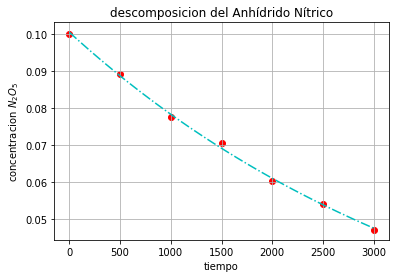

In [14]:
xs=np.linspace (x.min(),x.max())
ys=f(xs,*param)

plt.scatter(x,y,c='r')
plt.plot(xs,ys,'c-.')
plt.xlabel('tiempo')
plt.ylabel('concentracion $N_2O_5$')
plt.title('descomposicion del Anhídrido Nítrico')
plt.grid()
plt.show()

#Regresion potencial

El modelo potencial tiene la forma:

$$y = ax^b$$

Donde $a$ y $b$ son los parámetros a determinar

La ecuación de Bernoulli para un flujo continuo que sale de un tanque se relaciona con el flujo Q y la altura h del tanque.

$$Q=kh^a$$

Los datos del flujo como función del nivel del líquido se muestran en la siguiente tabla:

$$
\begin{array}{|l|c|c|c|c|}
\hline
Altura h& 5& 40& 70& 100\\
\hline
Flujo Q &0.2322& 0.6450& 0.820& 0.9856\\
\hline
\end{array}
$$

Estimar los valores de $k$ y $a$.

In [18]:
x = np.array([5 ,40 ,70 ,100])
y = np.array([0.2322 ,0.6450 ,0.820 ,0.9856])

In [19]:
def Q(h,k,a):
  return k*h**a

In [20]:
param ,_= curve_fit(Q,x,y)
print ( param )

[0.10975514 0.47604171]


Por lo tanto la ecuación es:

$$Q = 0.10975514h^{0.47604171}$$

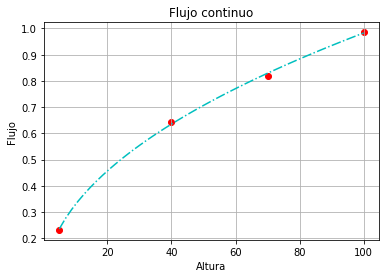

In [23]:
xs=np.linspace (x.min(),x.max())
ys=Q(xs,*param)

plt.scatter(x,y,c='r')
plt.plot(xs,ys,'c-.')
plt.xlabel('Altura')
plt.ylabel('Flujo')
plt.title('Flujo continuo')
plt.grid()
plt.show()

#Regresion reciproca o hiperbolica

El modelo Recíproco o Hiperbólico tiene la forma:

$$y=\frac{1}{a+bx}$$

Donde $a$ y $b$ son los parámetros a determinar.

La ecuación de Antoine obtiene la
presión de vapor de una sustancia a distintas temperaturas.

$$
log(P) = a+\frac{b}{c+t}
$$

Los datos de la presión de vapor como función de la temperatura se muestran en la siguiente
tabla:

$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|c|}
\hline
T (C) &20& 22& 25& 27& 30& 34& 40& 43& 48& 51\\
\hline
log(P) (mmHg)&1.175& 1.230& 1.312& 1.365& 1.443& 1.544& 1.690& 1.761& 1.875& 1.942\\
\hline
\end{array}
$$

Estimar los valores de $a$,$b$ y $c$ de la ecuación de Antoine.

In [25]:
x = np.array([20 ,22 ,25 ,27 ,30 ,34 ,40 ,43 ,48 ,51])
y = np.array([1.175 ,1.230 ,1.312 ,1.365 ,1.443 ,\
              1.544 ,1.690 ,1.761 ,1.875 ,1.942])

In [26]:
def P(t,a,b,c):
  return a+b/(c+t)

In [27]:
param ,_= curve_fit(P,x,y)
print ( param )

[    7.97152383 -1657.04353334   223.80983991]


Por lo tanto la ecuación de Antoine es:

$$
log(P) = 7.97152383-\frac{1657.04353334}{223.80983991+t}
$$


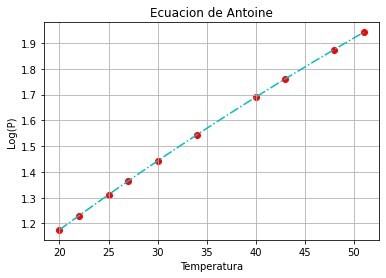

In [29]:
xs=np.linspace (x.min(),x.max())
ys=P(xs,*param)

plt.scatter(x,y,c='r')
plt.plot(xs,ys,'c-.')
plt.xlabel('Temperatura')
plt.ylabel('Log(P)')
plt.title('Ecuacion de Antoine')
plt.grid()
plt.show()